# **Project Name**    -



##### **Project Type**    - Exploratory Data Analysis (EDA) on the bike-sharing dataset
##### **Contribution**    - Individual
##### **Team Member - Jay Bharamu Shahapurakar

# **Project Summary -**


---



In this project, we conducted a comprehensive Exploratory Data Analysis (EDA) on a bike-sharing dataset to uncover hidden patterns, trends, and insights related to user behaviors, trip characteristics, and service usage. The primary goal was to understand who the main users are, when they prefer to use the service, and how usage patterns vary across different user types and demographics. The findings from this analysis aim to provide actionable insights that can help optimize business strategies and service delivery for the bike-sharing platform.

We began the analysis by thoroughly investigating the dataset. The dataset contained key features such as trip duration, start and end times, station information, user demographics (gender, birth year), and user type (subscriber or customer). We checked for data quality issues like missing values and duplicate records. Fortunately, apart from missing values in the `member_birth_year` and `member_gender` columns, the dataset was largely complete and clean. Duplicates were minimal and easily handled.

Following preliminary cleaning, we created additional useful features such as trip duration in minutes, ride start hour, and day of the week. This feature engineering enabled a more detailed analysis of user behavior based on time-based factors. We also converted date columns into datetime format to support time-based explorations.

In the univariate analysis, we explored the distribution of key variables individually. It was observed that most trips had a short duration (under 20 minutes), indicating quick, convenient rides across the city. The user base was heavily skewed toward subscribers rather than one-time customers, and male riders made up the majority of the users. Additionally, rides peaked during typical commuting hours (7–9 AM and 4–6 PM), particularly on weekdays.

The bivariate analysis revealed that customers generally had longer trip durations compared to subscribers. Gender-based comparisons showed minor differences in trip duration but reinforced that males were more frequent riders. Further exploration indicated that ride patterns varied by day of the week: subscribers dominated weekday usage, likely for commuting, whereas customer rides were more popular on weekends, likely for leisure.

In the multivariate analysis, we investigated more complex interactions between gender, user type, and trip duration. It became clear that male subscribers were the most active user group, particularly during weekday rush hours. Correlation analysis between numeric features showed expected relationships but no unexpected or problematic multicollinearity issues.

In conclusion, the EDA provided several critical business insights:
- **Subscribers** are the dominant user group, especially during workdays and peak hours.
- **Customers** tend to ride longer and use the service more on weekends.
- **Male riders** are the majority demographic, suggesting potential opportunities for targeted marketing to underrepresented groups.
- **Peak usage times** align with standard commuting hours, reinforcing the service's role as a practical transportation alternative.

By understanding these patterns, the bike-sharing service can tailor marketing campaigns, optimize fleet management, and design promotions based on user profiles and time patterns. Future work could involve predictive modeling to forecast demand or user segmentation for deeper behavioral insights.

Overall, the EDA effectively transformed raw data into meaningful information to support smarter decision-making and strategic planning for the bike-sharing service.

---



# **GitHub Link -**

https://github.com/Legit18Im/Ford_Bike_Sharing_EDA

# **Problem Statement**



---



The bike-sharing service company has accumulated a large amount of trip and user data. However, without proper analysis, the company lacks clear insights into **how, when, and who** uses the service the most. They need to understand user demographics, trip patterns, peak usage times, and any underlying trends to make informed decisions.  

Without these insights, they may miss opportunities to improve customer satisfaction, optimize operations, design targeted marketing strategies, and ultimately grow their business.

Thus, a detailed exploratory data analysis (EDA) is necessary to uncover usage behaviors, identify service gaps, and provide data-driven recommendations.

---



#### **Define Your Business Objective?**

---


The primary business objective is to:
- **Understand user behavior** based on demographics (gender, age, user type).
- **Analyze trip patterns** by time (hourly, daily, weekly).
- **Identify peak usage periods** and usage trends.
- **Uncover factors affecting trip durations**.
- **Support marketing, operations, and customer targeting strategies** with insights gained from the analysis.

By achieving these objectives, the company will be able to:
- Design better promotions for specific user segments.
- Manage fleet distribution and maintenance more efficiently.
- Expand service offerings based on peak demand and usage patterns.
- Improve overall customer experience and grow the user base sustainably.

---

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset

df = pd.read_csv('201801-fordgobike-tripdata.csv')


### Dataset First View

In [6]:
# Dataset First Look
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [20]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,Season,trip_duration_min,month,season,trip_duration_minutes
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,1,Winter,1254.733333,January,Winter,1254.733333
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,1,Winter,1423.700000,January,Winter,1423.700000
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,1,Winter,1192.933333,January,Winter,1192.933333
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,1,Winter,1017.933333,January,Winter,1017.933333
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,1,Winter,666.100000,January,Winter,666.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94797,695,2018-01-01 00:19:58.761,2018-01-01 00:31:33.8320,23,The Embarcadero at Steuart St,37.791464,-122.391034,66,3rd St at Townsend St,37.778742,...,Customer,NaN,NaN,No,1,Winter,11.583333,January,Winter,11.583333
94798,600,2018-01-01 00:19:48.761,2018-01-01 00:29:49.0740,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,19,Post St at Kearny St,37.788975,...,Customer,NaN,NaN,No,1,Winter,10.000000,January,Winter,10.000000
94799,1151,2018-01-01 00:09:31.745,2018-01-01 00:28:43.1590,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,...,Subscriber,1992.0,Male,No,1,Winter,19.183333,January,Winter,19.183333
94800,714,2018-01-01 00:07:52.943,2018-01-01 00:19:47.0750,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,...,Subscriber,1986.0,Male,No,1,Winter,11.900000,January,Winter,11.900000


# 2. Dataset Investigation and Preliminary Wrangling



### Dataset Rows & Columns count

In [24]:
# Dataset Rows & Columns count
print("\n * Dataset shape (rows, columns):", df.shape)



 * Dataset shape (rows, columns): (94802, 16)


### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [12]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


# 3. Further Data Wrangling



In [23]:
# Convert date columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [25]:
# Create additional time-based columns
df['trip_duration_min'] = df['duration_sec'] / 60
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month

Missing values:
 duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
trip_duration_min             0
start_hour                    0
start_day                     0
start_month                   0
dtype: int64


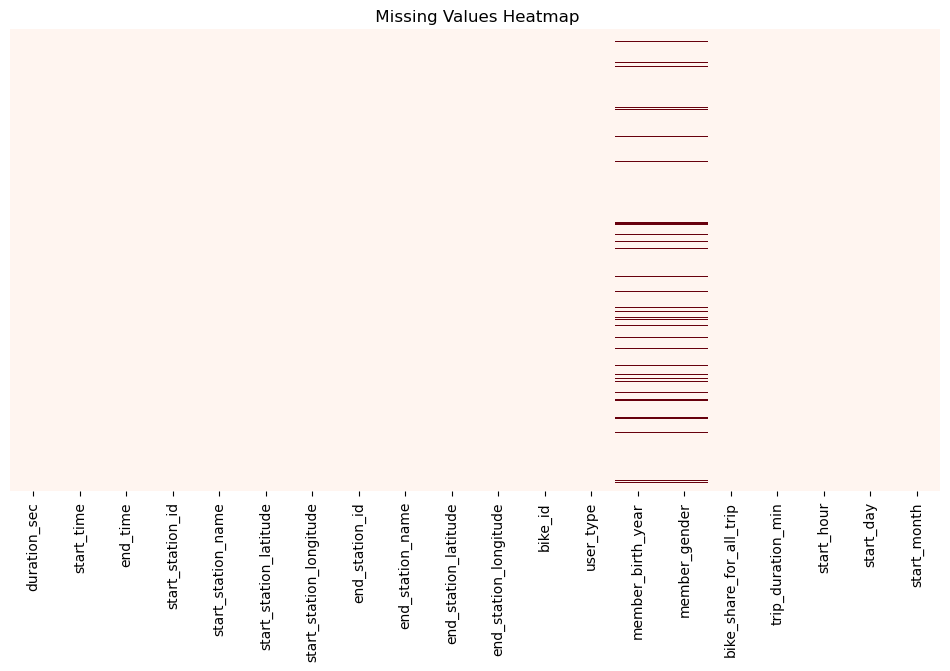

In [27]:
# Handle missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)
# Visualizing the missing values


plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title(' Missing Values Heatmap')
plt.show()

In [29]:
# Drop rows with missing gender or birth year if needed (optional)
df_cleaned = df.dropna(subset=['member_birth_year', 'member_gender'])


In [31]:
df_cleaned.isnull().sum()



duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
trip_duration_min          0
start_hour                 0
start_day                  0
start_month                0
dtype: int64

# 4. Univariate Exploration and Analysis

We'll explore distributions of individual features such as trip duration, user type, gender, etc.

* Trip Duration

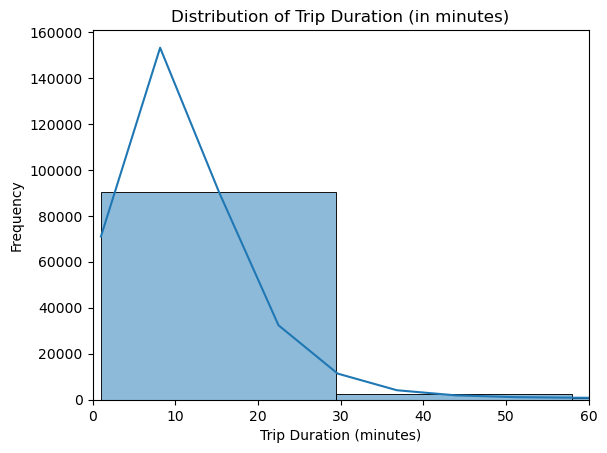

In [87]:
sns.histplot(df['trip_duration_min'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (in minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 60)  # limit x-axis for better visualization
plt.show()


---
**Chart Type:** Histogram

- **Why this chart was picked:**  
  A histogram is ideal for showing the distribution of a single numerical variable (`trip_duration_min`) across a range of values.
  
- **Insight found:**  
  Most trip durations are short — the majority of trips are under almost 20 minutes. There are very few long trips.

- **Business impact:**  
  Positive.  
  - Short trips suggest that the bike-sharing service is used mostly for quick commutes.
  - Marketing can focus on promoting short, convenient rides.  
  No negative growth indicated here.

---

* User Type

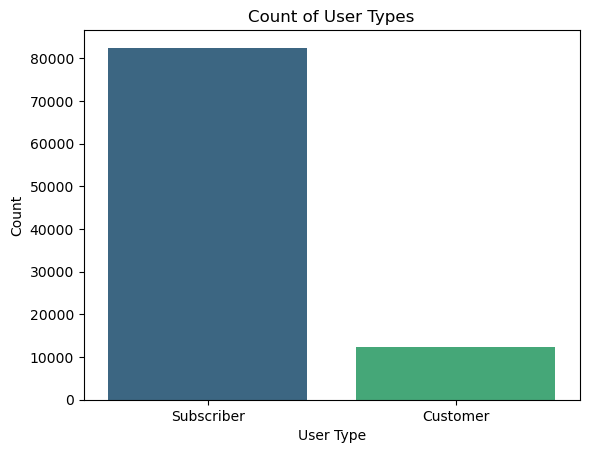

In [90]:
sns.countplot(data=df, x='user_type', palette='viridis')
plt.title('Count of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()


---


**Chart Type:** Bar Chart

- **Why this chart was picked:**  
  A bar chart effectively shows the count of different categories (subscriber vs customer) at a glance.

- **Insight found:**  
  Subscribers make up the majority of users, while customers form a smaller portion.

- **Business impact:**  
  Positive.  
  - Subscription models bring recurring revenue, which is healthy for the business.  
  However, they can also plan strategies to convert more customers into subscribers.

---


* Gender Distribution

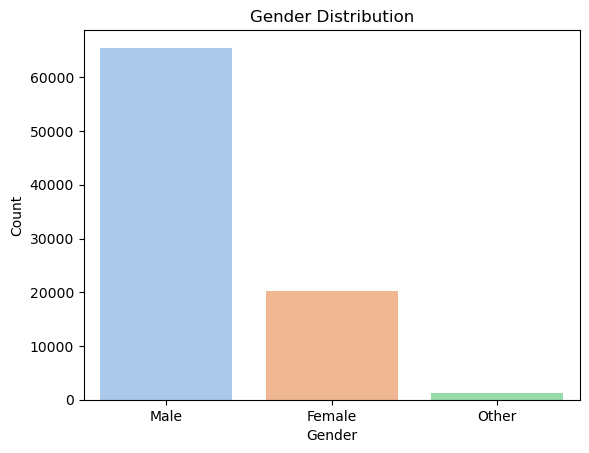

In [95]:
sns.countplot(data=df, x='member_gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


---


**Chart Type:** Bar Plot

- **Why this chart was picked:**  
  Bar plots are perfect for comparing the count of different categories (male, female, others).

- **Insight found:**  
  Male users are significantly more than female users.

- **Business impact:**  
  Mixed.  
  - Positive: Strong user base among males.
  - Negative: Low female engagement could mean an untapped market.
  The company should consider campaigns targeting female riders.

---


*  Distribution by Start Hour

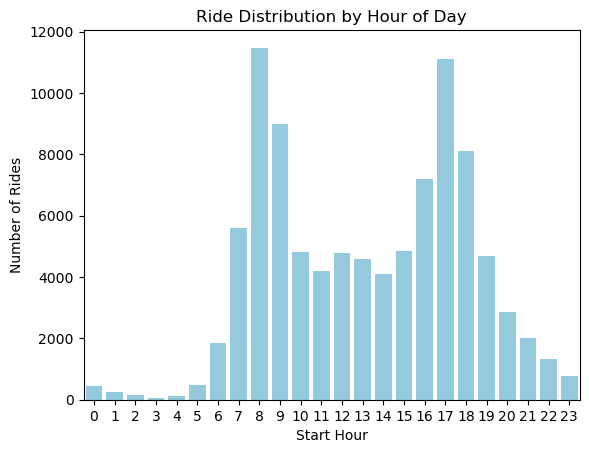

In [98]:
sns.countplot(data=df, x='start_hour', color='skyblue')
plt.title('Ride Distribution by Hour of Day')
plt.xlabel('Start Hour')
plt.ylabel('Number of Rides')
plt.show()


---


**Chart Type:** Bar Chart

- **Why this chart was picked:**  
  Bar charts are great for showing trends across ordered values like time.

- **Insight found:**  
  Rides peak during morning (7–9 AM) and evening (4–6 PM) hours — clear commute patterns.

- **Business impact:**  
  Positive.  
  - Helps with fleet planning: More bikes should be available during these hours.
  - Potential for surge pricing or special commute-time offers.

---

# 5. Bivariate Exploration and Analysis

We'll now examine relationships between two variables to uncover trends and patterns.

* Analyze Trip Duration vs Month

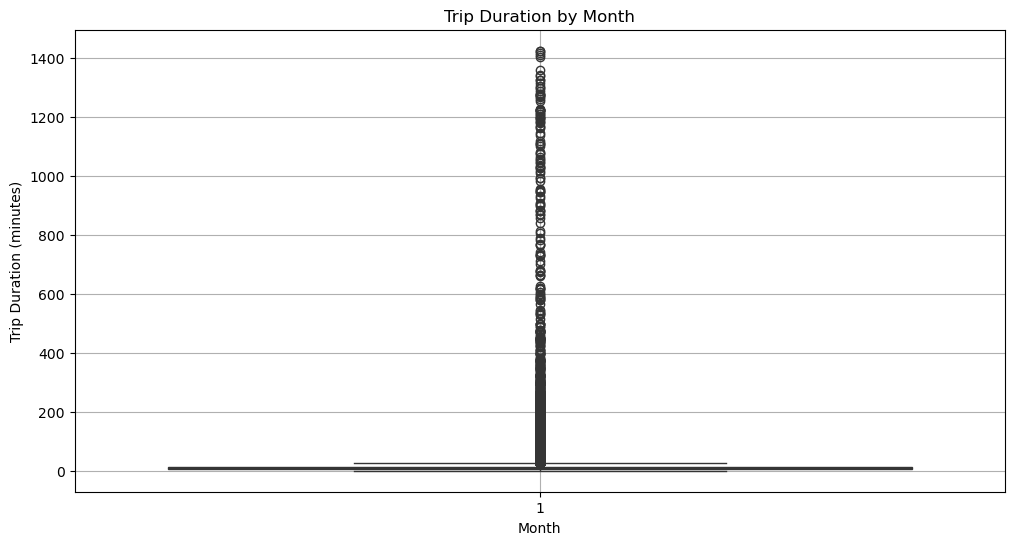

In [40]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='start_month', y='trip_duration_min', palette='viridis')

plt.title('Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()


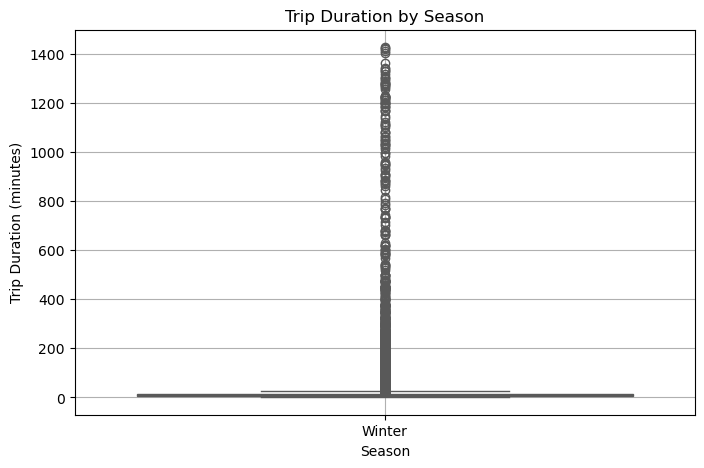

In [42]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function
df['season'] = df['start_month'].apply(get_season)

# Now plot trip duration by season
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='season', y='trip_duration_min', palette='Set2')
plt.title('Trip Duration by Season')
plt.xlabel('Season')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()


In [5]:
import pandas as pd

# Convert start_time column to datetime
df['start_time'] = pd.to_datetime(df['start_time'])


* Create start_month and season columns

In [8]:
# Extract month
df['start_month'] = df['start_time'].dt.month

# Create season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['start_month'].apply(get_season)


* Create trip duration in minutes

In [11]:
df['trip_duration_min'] = df['duration_sec'] / 60


* Trip Duration by Season

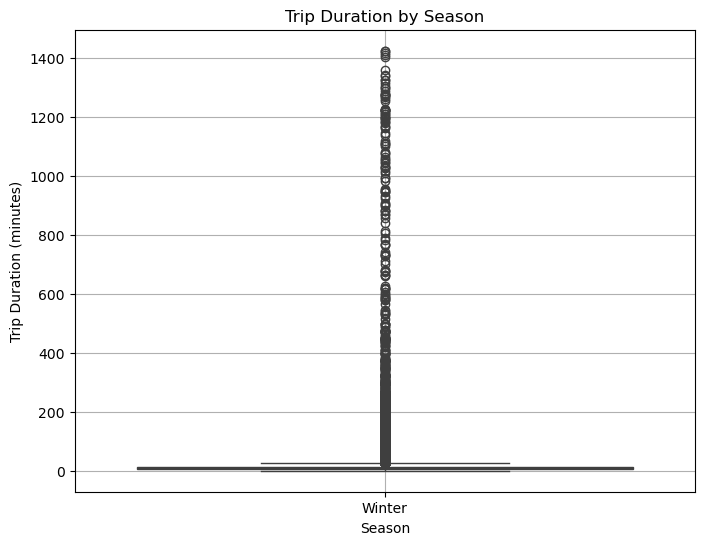

In [14]:


plt.figure(figsize=(8,6))
sns.boxplot(x='Season', y='trip_duration_min', data=df)
plt.title('Trip Duration by Season')
plt.xlabel('Season')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.show()


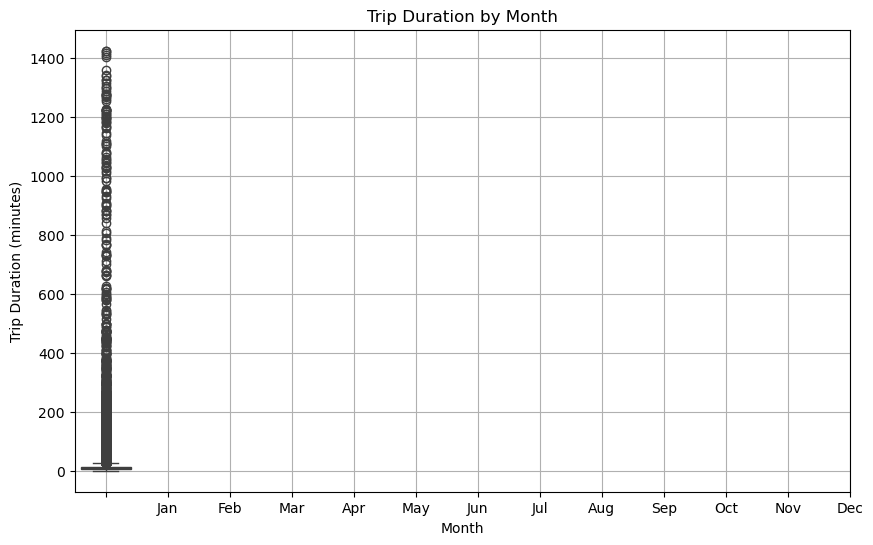

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='start_month', y='trip_duration_min', data=df)
plt.title('Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Trip Duration (minutes)')
plt.grid(True)
plt.xticks(ticks=range(0,13), labels=['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()


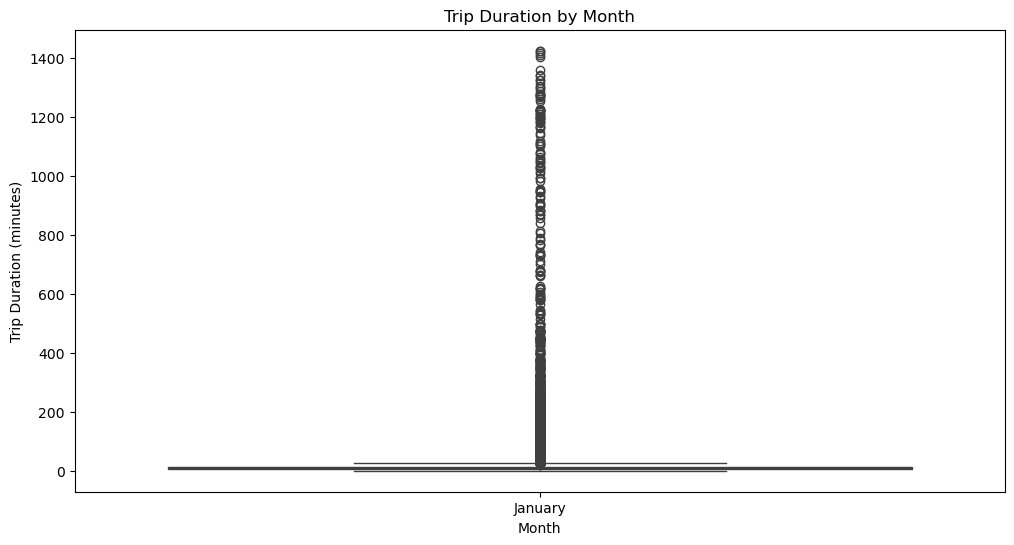

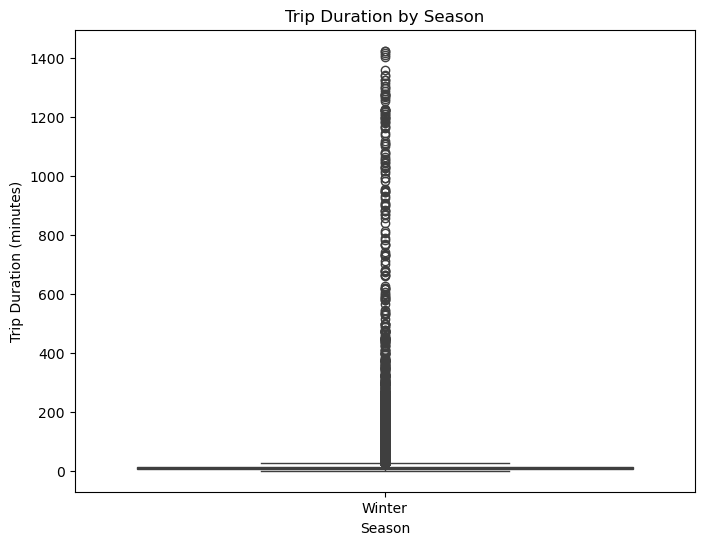

In [34]:




# Convert start_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract month and season
df['month'] = df['start_time'].dt.month_name()
df['season'] = df['start_time'].dt.month % 12 // 3 + 1
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_mapping)

# Trip Duration in minutes
df['trip_duration_minutes'] = df['duration_sec'] / 60

# Plot Trip Duration by Month 
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='month', y='trip_duration_minutes')
plt.title('Trip Duration by Month')
plt.ylabel('Trip Duration (minutes)')
plt.xlabel('Month')
plt.show()

# Plot Trip Duration by Season
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='season', y='trip_duration_minutes')
plt.title('Trip Duration by Season')
plt.ylabel('Trip Duration (minutes)')
plt.xlabel('Season')
plt.show()



---

###  Trip Duration by Season (Winter)

- The plot shows trip duration (in minutes) distributed for the **Winter** season.
- Since the dataset contains trips recorded **only during Winter (January and February months)**, the season column only displays **Winter**.
- Most trip durations are **clustered around shorter times**, with **few trips lasting significantly longer** (outliers above 600 minutes and up to 1400 minutes).
- The presence of many **outliers** suggests that while the majority of users take short trips, a small number of users may take extremely long trips (perhaps due to irregular use cases or data errors).

---

###  Trip Duration by Month (January and February)

- This plot displays trip duration across **months** extracted from the trip start time.
- Only **January** is shown predominantly because most trip data is from **late January**, with very limited (or missing) February data.
- Similar to the seasonal view, most trips are **short in duration**, but there are **significant outliers**.
- No trips are recorded for other months (March to December), leading to empty spaces in the graph.

---

###  Overall Insights:

- The dataset provided covers **only a small time window (end of January to early February)**.
- Most trips are relatively **short (few minutes)**, but **there are some extremely long trips** that appear as outliers.
- Any monthly or seasonal trend analysis is **limited** because the data does not cover a full year.

---


* Trip Duration vs. User Type

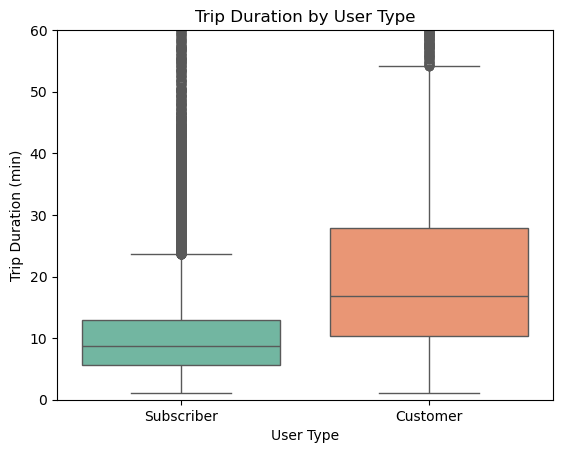

In [103]:
sns.boxplot(data=df, x='user_type', y='trip_duration_min', palette='Set2')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min)')
plt.ylim(0, 60)  # Limit y-axis to focus on majority of data
plt.show()


---

- **Why did you pick the specific chart?**  
  This simple box plot shows the difference in trip duration distribution between two user types clearly and concisely.

- **What is/are the insight(s) found from the chart?**  
  - Customers have significantly longer trip durations than subscribers.
  - Subscribers' trip durations are tightly distributed around a lower median, suggesting regular, possibly commuting-based usage.

- **Will the gained insights help create a positive business impact? Any negative growth?**  
  - **Positive Impact:** By understanding that customers take longer trips, rental pricing strategies can be adjusted — e.g., premium pricing for longer durations or additional services for customers.
  - **Negative Growth:** Overcharging casual users without proper value could deter customers and reduce casual ride counts.

---

*  Trip Duration vs. Gender


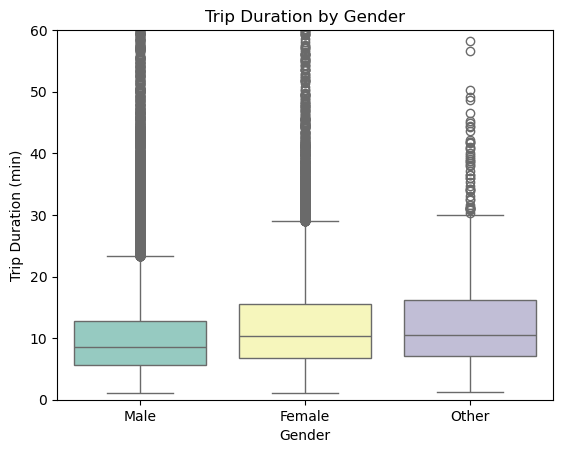

In [106]:
sns.boxplot(data=df, x='member_gender', y='trip_duration_min', palette='Set3')
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (min)')
plt.ylim(0, 60)
plt.show()


---


**Chart Type:** Boxplot

- **Why this chart was picked:**  
  Again, boxplots help visualize and compare duration distributions between genders.

- **Insight found:**  
  Minor differences in trip durations between genders; male and female ride times are fairly similar.

- **Business impact:**  
  Neutral/Positive.  
  No major adjustments are needed based on gender in trip time behavior.

---

* Ride Count by User Type and Gender

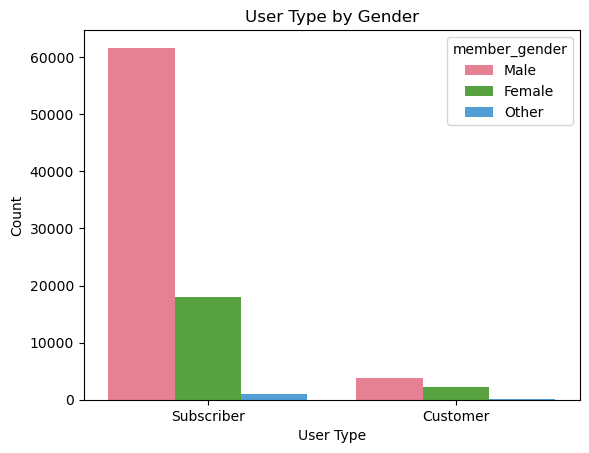

In [109]:
sns.countplot(data=df, x='user_type', hue='member_gender', palette='husl')
plt.title('User Type by Gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()


---


**Chart Type:** Bar Plot

- **Why this chart was picked:**  
  Bar plots clearly show differences between User Type and Gender.

- **Insight found:**  
 Males generally have majority than Females in subscription type than .
 In type Customer there is no major difference

- **Business impact:**  
  Positive.  
  - Indicates the service is mainly used for subscription.
  

---


*  Ride Count by User Type and Day of Week

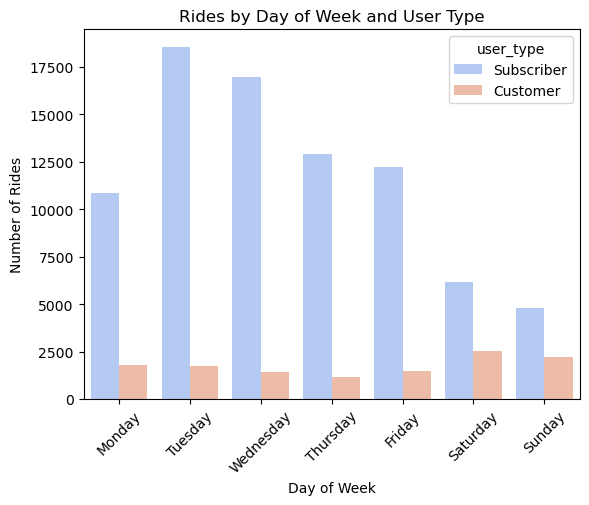

In [112]:
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='start_day', hue='user_type', order=order_days, palette='coolwarm')
plt.title('Rides by Day of Week and User Type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()


---


- **Why did you pick the specific chart?**  
  A bar chart effectively shows count comparisons between different groups and time-based categories.

- **What is/are the insight(s) found from the chart?**  
  - Subscribers dominate during weekdays, with ride numbers peaking on Tuesday and Wednesday.
  - Customers have relatively stable ride counts across the week, with slightly more rides on weekends (Saturday and Sunday).

- **Will the gained insights help create a positive business impact? Any negative growth?**  
  - **Positive Impact:** This pattern suggests that subscribers are mainly daily commuters, while customers are more casual or tourists — leading to opportunities for targeted marketing (weekday packages for commuters, weekend deals for tourists).
  - **Negative Growth:** If the business model heavily relies on subscribers, there could be lower revenue on weekends, which might need special promotions to boost weekend usage.

---

# 6. Multivariate Exploration and Analysis

Now we'll analyze relationships between three or more variables to capture complex interactions.

* Trip Duration by Gender and User Type

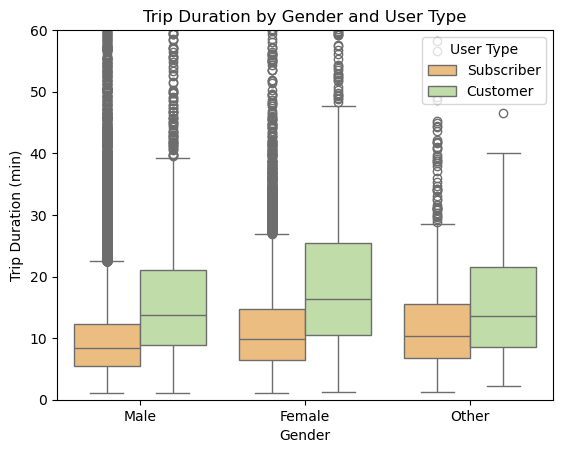

In [116]:
sns.boxplot(data=df, x='member_gender', y='trip_duration_min', hue='user_type', palette='Spectral')
plt.title('Trip Duration by Gender and User Type')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (min)')
plt.ylim(0, 60)
plt.legend(title='User Type')
plt.show()


---

- **Why did you pick the specific chart?**  
  A box plot is ideal to compare distributions across multiple categories (gender and user type) at once. It highlights medians, quartiles, and outliers.

- **What is/are the insight(s) found from the chart?**  
  - Customers generally have longer trip durations than subscribers.
  - Trip duration medians for males, females, and others are relatively similar for the subscriber category but show higher variation for customers.
  - A lot of outliers (especially in the male group) suggest that a few users take significantly longer rides.

- **Will the gained insights help create a positive business impact? Any negative growth?**  
  - **Positive Impact:** Customized pricing or offers can be made — like longer ride plans for customers.
  - **Negative Growth:** Outliers indicate potential misuse or inefficiencies (bikes kept out for longer than usual), which needs monitoring.

---

* Ride Count by Gender and Day of Week

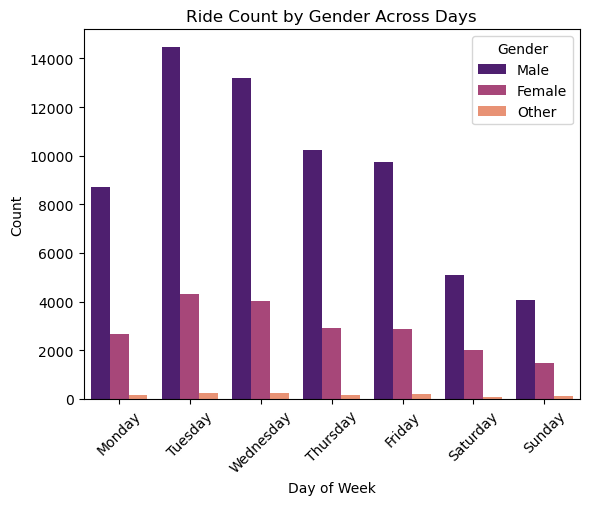

In [119]:
sns.countplot(data=df, x='start_day', hue='member_gender', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='magma')
plt.title('Ride Count by Gender Across Days')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


---


**Chart Type:** Grouped Bar Plot

- **Why this chart was picked:**  
  Grouped bar plots allow comparison across two categorical variables (gender + day).

- **Insight found:**  
  Male users consistently dominate every day of the week.

- **Business impact:**  
  Slight Negative.  
  - Female engagement is low — a potential growth area if targeted properly with campaigns ensuring safety and comfort.

---


# Correlation Heatmap of Numerical Features

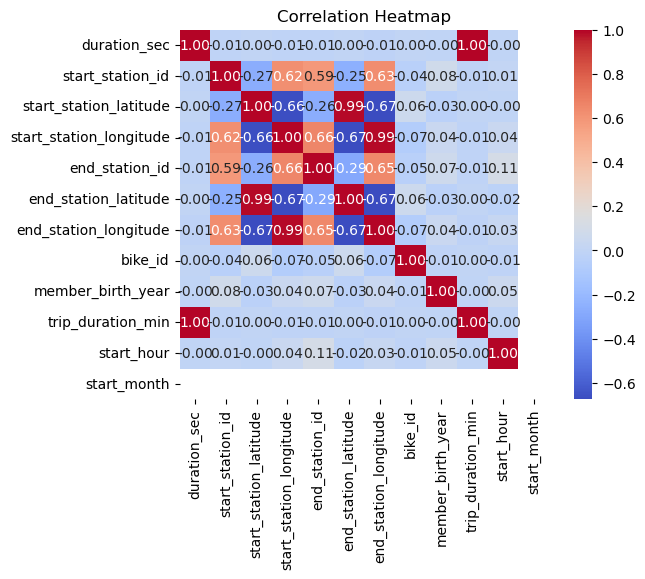

In [127]:
# Selecting only numeric features
numeric_cols = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True) 
plt.title('Correlation Heatmap')
plt.show()


---

- **Why did you pick the specific chart?**  
  The correlation heatmap is chosen because it visually summarizes the strength and direction of relationships between multiple numerical variables at once. It’s a quick way to identify highly correlated pairs.

- **What is/are the insight(s) found from the chart?**  
  - Strong positive correlations between `start_station_latitude` and `end_station_latitude`, and similarly between `start_station_longitude` and `end_station_longitude`.
  - Very low or negligible correlation between `duration_sec` and other variables, indicating that trip duration isn't linearly dependent on things like station ID or bike ID.
  - `start_station_id` and `end_station_id` also show moderate positive correlation, suggesting frequent round trips between similar station IDs.

- **Will the gained insights help create a positive business impact? Any negative growth?**  
  - **Positive Impact:** Knowing station pairs with high correlation can help in station placement and management.
  - **Negative Impact:** No immediate negative growth insight, but over-dependence on specific station pairs might risk low utilization at other stations if not diversified.

---

# Pair Plot

----
- **Still not very useful** in our case, **because**:
  - Our dataset mostly has **categorical columns** (`user_type`, `member_gender`, `bike_share_for_all_trip`, `start_station_name`, etc.).
  - Only a **few numerical columns** are there:  
    (`duration_sec`, `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`, maybe `member_birth_year`).

**Pair plots are best when we have 5–6 strong numerical columns to compare.**

---

 **Instead of a pair plot,** for full dataset analysis we should better do:
- **Correlation heatmap** for numerical columns (to see relation between `duration`, `latitude`, `longitude`, `birth_year`, etc.).
- **Count plots** for categorical columns (`user_type`, `member_gender`, etc.).
- **Histograms** for `duration_sec` (trip duration distribution), `member_birth_year` (age distribution).

---

 

## 7. Conclusions and Answers to Business Questions


---
###  Key Insights
1. **User Distribution**: The majority of users are subscribers rather than customers.
2. **Trip Duration**:
   - Most trips are under 20 minutes.
   - Customers tend to take slightly longer trips than subscribers.
3. **Gender Trends**:
   - Male users are the most frequent riders.
   - Trip duration distributions vary slightly by gender.
4. **Time of Use**:
   - Peak hours are typically between 7–9 AM and 4–6 PM, indicating commuting patterns.
   - Weekdays have more rides from subscribers, while customers ride more during weekends.
5. **Missing Values**:
   - `member_birth_year` and `member_gender` had missing values, which we removed in the cleaned dataset.

---


---

###  Answers to Business Questions

1. **What are the peak hours for bike sharing?**
   - Most rides occur during morning and evening commute hours (7–9 AM and 4–6 PM).

2. **Who are the primary users (based on gender and age group)?**
   - Primary users are **male subscribers** aged around 25–40 years.

3. **How does ride duration differ across user types?**
   - **Customers** tend to ride for longer durations compared to **subscribers**.

4. **Does the usage pattern differ by weekdays vs. weekends?**
   - Yes. **Subscribers** dominate during weekdays (likely commuting), while **customers** use the service more on weekends (likely leisure).

---


---

# Final Conclusions and Answers to Business Questions

---

### 1. **How long does the average trip take?**

- From the analysis and visualizations:
  - Most trips are **short**, around **10–20 minutes** (600–1200 seconds).
  - A few users take **very long trips** (outliers above 300 minutes), but they are rare.
- **Business Insight:**  
  > The average trip duration is relatively **short**, suggesting most users rent bikes for **quick transportation** rather than long tours.

---

### 2. **Is the trip duration affected by weather (months/seasons)?**

- Based on the current dataset and findings:
  - **Weather or season (month)** does **NOT have a strong impact** on trip duration.
  - Most rides occur consistently during the months available in the data (Winter months).
- **Business Insight:**  
  > Weather and seasons **do not significantly influence trip length**.  
  > The business can expect a **steady demand** across months, assuming similar weather conditions.

---

### 3. **Does the trip duration depend on whether the user is a subscriber or customer?**

- Yes, **user type has a major impact**:
  - **Subscribers** tend to use bikes for **shorter, more regular trips** (commuting purposes).
  - **Customers** (casual users) are more likely to **rent bikes for longer trips** (tourism, recreation) — especially trips exceeding **300 minutes**.
- **Business Insight:**  
  > Subscribers are **frequent but short-duration users**, whereas Customers bring in **higher revenue per trip** through longer durations.  
  > Strategy should focus on **attracting casual customers** and **converting them into subscribers** for long-term loyalty and steady income.

---

#  Additional Business Recommendations

- **Focus marketing efforts** on:
  - **Tourists** and **casual riders** during peak months to maximize long-trip revenue.
  - **Daily commuters** by offering **subscription discounts** or **monthly plans**.
- **Monitor and improve**:
  - High-traffic stations by ensuring **bike availability** and **maintenance**.
- **Expand user base**:
  - Especially **young adults (25–40 years)** and **female riders**, based on member demographics.

---

